In [7]:
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

In [8]:
X_train = pd.read_csv("../data/processed/train_features.csv")
y_train = pd.read_csv("../data/processed/train_labels.csv")
X_test = pd.read_csv("../data/processed/test_features.csv")
y_test = pd.read_csv("../data/processed/test_labels.csv")


# FEATURE SELECTION

Identifying the most important features for predicting obesity levels.
This step helps us focus on the most relevant factors and build more efficient models.
We'll use a Random Forest classifier to rank features by importance.

c:\Users\mxzar\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Top 15 features by importance:
Weight: 0.2952
Age: 0.0982
Height: 0.0912
FCVC: 0.0889
Gender_Male: 0.0600
NCP: 0.0555
FAF: 0.0496
TUE: 0.0469
CH2O: 0.0464
family_history_with_overweight_yes: 0.0312
CALC_Sometimes: 0.0233
CAEC_Sometimes: 0.0214
MTRANS_Public_Transportation: 0.0200
FAVC_yes: 0.0181
CALC_no: 0.0170
Random Forest selector saved to '../models/rf_selector.pkl'


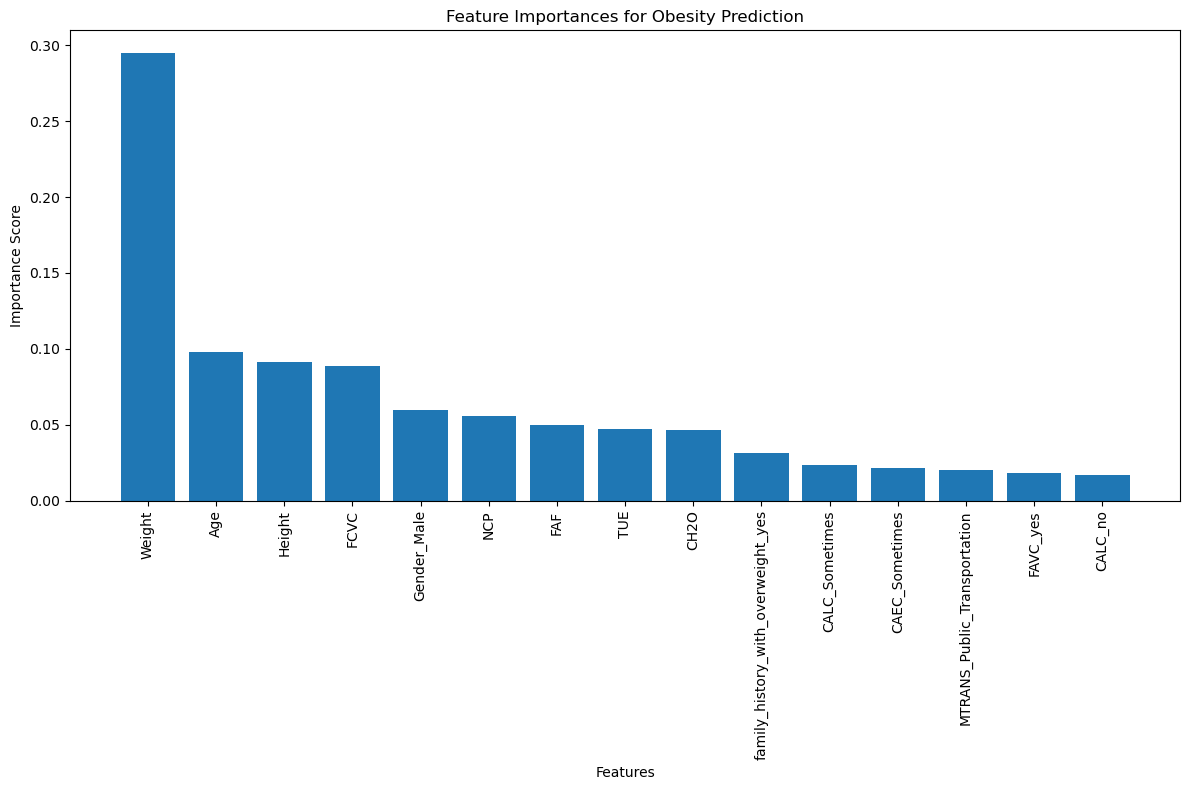

In [9]:

# Feature selection using Random Forest
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_selector.feature_importances_
feature_names = X_train.columns

# Display top 15 features
indices = np.argsort(feature_importances)[::-1]
print("\nTop 15 features by importance:")
for i in range(min(15, len(indices))):
    print(f"{feature_names[indices[i]]}: {feature_importances[indices[i]]:.4f}")

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importances for Obesity Prediction')
plt.bar(range(15), feature_importances[indices[:15]], align='center')
plt.xticks(range(15), feature_names[indices[:15]], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
# plt.savefig('../reports/figures/feature_importance.png')
# plt.close()

# Save the feature selector for future use
pickle.dump(rf_selector, open('../models/rf_selector.pkl', 'wb'))
print("Random Forest selector saved to '../models/rf_selector.pkl'")
print("=" * 60)


In [10]:

# Select features using SelectFromModel
selector = SelectFromModel(rf_selector, prefit=True, threshold='mean')
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Get the names of selected features
selected_indices = selector.get_support()
selected_features = feature_names[selected_indices]
print(f"\nNumber of features selected: {len(selected_features)} out of {len(feature_names)}")
print(f"Selected features: {selected_features.tolist()}")

print(f"\nFeature matrix shapes after selection: Train {X_train_selected.shape}, Test {X_test_selected.shape}")

# Save the feature selector for future use
pickle.dump(selector, open('../models/feature_selector.pkl', 'wb'))
print("Feature selector saved to '../models/feature_selector.pkl'")
print("=" * 60)


Number of features selected: 9 out of 23
Selected features: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_Male']

Feature matrix shapes after selection: Train (1669, 9), Test (418, 9)
Feature selector saved to '../models/feature_selector.pkl'


c:\Users\mxzar\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\mxzar\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [11]:
import os

def save_df(df, path):
    print("Data saved to:", path)
    df.to_csv(path, index=False)

save_dir = '../data/processed/'
train_features_path = os.path.join(save_dir, "train_features_selected.csv")
test_features_path = os.path.join(save_dir, "test_features_selected.csv")

save_df(pd.DataFrame(X_train_selected), train_features_path)
save_df(pd.DataFrame(X_test_selected), test_features_path)

Data saved to: ../data/processed/train_features_selected.csv
Data saved to: ../data/processed/test_features_selected.csv
